중요한 사실!  
대규모 업데이트인 3rd, 4th, 5th next field 업데이트가 있었던 시기:  
3rd: 2019.12.12  
4th: 2020.06.25  
5th: 2020.12.17  
시즌 7이 시작한 시기가 2020.06.25/시즌7 시작과 함께 업데이트 반영됨.   
4th:   
중거리슛이 힘들어짐.  
전반적인 슈팅의 속도 및 슛 파워 능력치에 따른 슈팅의 속도도 하향 조정됨.  
자동 태클 발동되는 범위를 줄임.  
로빙 스루가 더 유용해짐.  
감아차기 슛 좀 더 유용해짐.  
패스 리시버 설정, 패스 반응성 개선: 패스 방식 조정-유저들이 적응하는 과도기  
  
5th: 시즌 13 중간에 업데이트됨.  
공격수 헤딩슛 정확도 리밸런싱: 헤딩슛 에러율 향상  
감아차기 효과 조정: 슈팅 궤적의 효과 소폭 하향/슈팅 파워 감소   
스탠딩 태클을 성공한 경우에 선수들간 부딪히는 경우를 줄이고 공을 안정적으로 확보  

- 표에는 2019년 시즌 정보도 포함되어 있음.  
=> 2020년 정보만 잘라내기  

- 몰수승, 몰수패는 플레이어들의 시즌별 트렌드를 보는데 적합하지 않음.: 제거하고 정상 종료인 행만 남기기  

- 시즌별로 상위 40명의 랭커 정보만 남기기, final_data에는 상위 랭커와 경기한 플레이어들의 정보도 포함되어 있었기 때문에 상위 랭커들의 시즌별 트렌드를 알아보는데 문제가 있음.   
  
  
- `idea`  
    상위랭커들은 시즌별 유리한 플레이 스타일에 민감할 것이라고 예측 가능!(새로운 패치에 적응하는 등!)  
    시즌별로 어떤 플레이 스타일이 유행했을까?  
    시즌별 플레이 특징은 무엇이었나? 어떤 것이 변화했나


---
seasonId                     object  
matchResult                  `범주형`  
matchEndType                 `범주형(꺾은선 그래프 3개)`  
systemPause                  이산형   
foul                         이산형  
injury                       이산형  
redCards                     이산형  
yellowCards                  이산형  
dribble                      이산형  
cornerKick                   이산형  
possession                   연속형  
offsideCount                 이산형  
averageRating                연속형  
controller                   `범주형`  
shootTotal                   이산형  
effectiveShootTotal          이산형  
shootOutScore                이산형  
goalTotal                    이산형  
goalTotalDisplay             이산형  
ownGoal                      이산형  
shootHeading                 이산형  
goalHeading                  이산형  
shootFreekick                이산형  
goalFreekick                 이산형  
shootInPenalty               이산형  
goalInPenalty                이산형  
shootOutPenalty              이산형  
goalOutPenalty               이산형  
shootPenaltyKick             이산형  
goalPenaltyKick              이산형  
passTry                      이산형  
passSuccess                  이산형  
shortPassTry                 이산형  
shortPassSuccess             이산형  
longPassTry                  이산형  
longPassSuccess              이산형  
bouncingLobPassTry           이산형  
bouncingLobPassSuccess       이산형  
drivenGroundPassTry          이산형  
drivenGroundPassSuccess      이산형  
throughPassTry               이산형  
throughPassSuccess           이산형  
lobbedThroughPassTry         이산형  
lobbedThroughPassSuccess     이산형  
blockTry                     이산형  
blockSuccess                 이산형   
tackleTry                    이산형  
tackleSuccess                이산형  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기 

In [2]:
pd.set_option('display.max_columns', 100)

In [152]:
mydf = pd.read_csv('final_data.csv', index_col = False)
pd.set_option('display.max_rows', 10)
mydf.head(100)

,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
0,LilScratch,201916,패,0,0,0,1,0,0,45,0,41,0,0.00000,etc,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77,65,63,57,6,5,0,0,2,2,4,1,1,0,7,1,14,7
1,LilScratch,201916,승,0,0,1,0,0,0,54,0,53,0,0.00000,etc,5,5,0,3,3,0,0,0,0,0,4,2,1,1,0,0,117,109,100,97,3,1,0,0,0,0,13,11,0,0,3,2,8,3
2,LilScratch,201916,승,1,0,0,0,0,0,14,1,57,0,0.00000,etc,4,4,0,3,3,0,1,1,0,0,3,2,1,1,0,0,22,21,18,17,1,1,0,0,0,0,3,3,0,0,1,0,4,4
3,LilScratch,201916,승,1,0,0,0,0,0,51,1,52,0,0.00000,etc,8,5,0,4,3,0,1,0,0,0,7,3,1,1,0,0,87,82,76,74,3,2,0,0,3,3,4,3,0,0,3,1,3,2
4,내오른발지단,201916,패,2,1,0,0,0,0,23,0,46,0,0.00000,etc,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,33,29,23,20,1,1,0,0,0,0,8,8,0,0,3,0,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,목따기도사,202004,패,0,0,2,0,0,0,52,1,44,0,3.70000,keyboard,2,1,0,1,1,0,0,0,0,0,2,1,0,0,0,0,64,52,33,29,6,5,0,0,4,2,20,16,1,0,6,0,15,11
96,livemighty,202004,패,0,0,0,0,0,0,70,1,55,0,3.54444,keyboard,4,2,0,0,0,0,0,0,0,0,2,0,2,0,0,0,75,68,61,58,5,2,0,0,0,0,8,7,1,1,7,1,9,7
97,인생은역시섹th,202004,무,0,0,0,0,0,0,104,0,57,0,4.10556,gamepad,2,2,0,2,2,0,0,0,0,0,2,2,0,0,0,0,136,129,121,114,3,3,0,0,5,5,7,7,0,0,5,0,11,8
98,HKPKP,202004,무,0,0,0,0,0,0,65,2,44,0,4.99444,keyboard,6,5,0,2,2,0,1,0,0,0,3,1,3,1,0,0,101,87,76,70,7,2,0,0,1,1,14,13,2,1,4,0,15,7


In [158]:
pd.set_option('display.max_rows', 20)
mydf[mydf['controller'] == 'gamepad']['seasonId'].value_counts().sort_values()

202003     3307
202004     5802
202005     6036
202006     7661
202007    10816
202009    11672
202008    11776
202010    12376
202014    13805
202011    15032
202012    15689
202013    17241
Name: seasonId, dtype: int64

In [159]:
mydf[mydf['controller'] == 'keyboard']['seasonId'].value_counts().sort_values()

202003    1380
202004    2274
202005    2452
202006    2882
202009    3326
202007    3796
202008    3804
202014    4108
202010    4286
202011    4692
202012    5611
202013    5777
Name: seasonId, dtype: int64

In [160]:
mydf[mydf['controller'] == 'etc']['seasonId'].value_counts().sort_values()

202005      59
202004      86
202007      99
202006     101
202009     110
          ... 
202003    2239
201919    2871
201918    3403
202001    4316
202002    6124
Name: seasonId, Length: 21, dtype: int64

시즌별로 id groupby 해서
해당시즌 랭커 탑40 닉네임이랑 매칭되는 id만 찾으면 될겁니다  

In [4]:
user_list = pd.read_csv('user_list.csv', index_col = False)
user_list

,0
0,Revive승환
1,AF정성민
2,AF강준호
3,SB원창연
4,이게견재영
...,...
515,갤럭시김시경
516,SainT연지동
517,올라가다
518,리치인미


In [5]:
user_list.rename(columns = {'0' : 'nickname'}, inplace = True)
user_list

,nickname
0,Revive승환
1,AF정성민
2,AF강준호
3,SB원창연
4,이게견재영
...,...
515,갤럭시김시경
516,SainT연지동
517,올라가다
518,리치인미


In [21]:
season1_user = list(user_list['nickname'][:40])
season2_user = list(user_list['nickname'][40:80])
season3_user = list(user_list['nickname'][80:120])
season4_user = list(user_list['nickname'][120:160])
season5_user = list(user_list['nickname'][160:200])
season6_user = list(user_list['nickname'][200:240])
season7_user = list(user_list['nickname'][240:280])
season8_user = list(user_list['nickname'][280:320])
season9_user = list(user_list['nickname'][320:360])
season10_user = list(user_list['nickname'][360:400])
season11_user = list(user_list['nickname'][400:440])
season12_user = list(user_list['nickname'][440:480])
season13_user = list(user_list['nickname'][480:520])
season1_user

['Revive승환',
 'AF정성민',
 'AF강준호',
 'SB원창연',
 '이게견재영',
 'iNNo오빽',
 '언베리기홍',
 'iNNo2002',
 'ManCity김성훈',
 '90minMuse',
 '1st윤형석',
 'GalaxyXG최승혁',
 'AF곽준혁',
 'AfreecaTVBJ섭이',
 '매운닭발3',
 'iNNo강동현',
 'ManCity한승엽',
 'SB차현우',
 'SB변우진',
 '간재인님',
 'ManCity김유민',
 'Unvary진성',
 'AF정성민2',
 'maronedessert',
 'ZI0S0NGZI0',
 '전략부정과장',
 '리바이브뷕쉬뷔',
 'AF박준효',
 '90min허태원',
 'AF정성민3',
 'UnLMTD박민근',
 'GalaxyXG홍경표',
 '대가비트',
 'UnLMTD소재준',
 '리바이브궁뎅',
 '리바이브언더독',
 '양우퀸',
 '90min장혁재',
 '리바이브즐겜유저',
 'AbleStar석진']

In [8]:
type(season1_user)

pandas.core.series.Series

In [23]:
season1_data = mydf[mydf['seasonId'] == 202001]
season2_data = mydf[mydf['seasonId'] == 202002]
season3_data = mydf[mydf['seasonId'] == 202003]
season4_data = mydf[mydf['seasonId'] == 202004]
season5_data = mydf[mydf['seasonId'] == 202005]
season6_data = mydf[mydf['seasonId'] == 202006]
season7_data = mydf[mydf['seasonId'] == 202007]
season8_data = mydf[mydf['seasonId'] == 202008]
season9_data = mydf[mydf['seasonId'] == 202009]
season10_data = mydf[mydf['seasonId'] == 202010]
season11_data = mydf[mydf['seasonId'] == 202011]
season12_data = mydf[mydf['seasonId'] == 202012]
season13_data = mydf[mydf['seasonId'] == 202013]
season1_data

,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
22166,Mysterio,202001,승,0,0,0,1,0,0,51,1,56,0,4.48333,etc,6,6,0,2,2,0,0,0,1,0,4,2,2,0,0,0,92,80,60,55,7,4,0,0,7,6,16,14,1,1,6,1,28,18
22167,쪼호드러가써요,202001,승,1,1,0,1,0,0,36,1,55,1,4.37222,etc,4,3,0,2,3,0,1,0,0,0,3,2,1,0,0,0,89,81,60,56,6,2,0,0,3,3,17,17,3,3,5,1,5,3
22168,냉정심,202001,패,0,0,1,0,0,0,47,0,48,0,3.85556,etc,4,2,0,1,1,0,1,0,0,0,3,1,1,0,0,0,130,110,92,82,5,3,0,0,8,8,22,17,0,0,14,0,15,8
22169,굴리트의트릭교실,202001,패,2,1,0,0,0,0,23,1,38,1,3.43889,etc,4,3,0,0,0,0,2,0,0,0,4,0,0,0,0,0,49,41,39,34,3,2,0,0,0,0,6,5,0,0,5,0,4,2
22170,Mysterio,202001,패,0,0,0,0,0,0,71,3,57,0,4.07778,etc,10,6,0,1,1,0,2,1,1,0,7,1,3,0,0,0,146,138,118,115,9,7,0,0,4,4,12,11,1,1,4,0,13,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202675,BlackPinkForever,202001,패,0,0,1,0,0,0,52,0,48,0,3.77222,etc,4,4,0,0,0,0,1,0,0,0,3,0,1,0,0,0,114,100,82,75,3,1,2,1,0,0,26,23,0,0,10,1,15,10
202676,김병하쳐바르자,202001,패,0,0,0,1,0,0,55,2,50,0,3.74444,etc,4,2,0,0,0,0,1,0,0,0,2,0,2,0,0,0,115,102,84,80,8,5,0,0,0,0,20,17,1,0,3,0,9,5
202677,WhiteER,202001,패,0,0,2,0,0,0,55,0,52,1,3.56667,etc,6,2,0,1,1,0,1,1,0,0,3,1,3,0,0,0,95,80,66,61,4,2,0,0,1,1,22,15,2,1,8,2,9,6
202678,등나무참치,202001,패,2,1,0,0,0,0,28,1,47,0,3.26111,etc,5,4,0,0,0,0,1,0,0,0,4,0,1,0,0,0,66,61,55,52,2,1,0,0,1,1,5,5,2,2,4,0,4,2


In [26]:
isin_filter1 = season1_data['nickname'].isin(season1_user)
df_1 = season1_data[isin_filter1]

isin_filter2 = season2_data['nickname'].isin(season2_user)
df_2 = season2_data[isin_filter2]

isin_filter3 = season3_data['nickname'].isin(season3_user)
df_3 = season3_data[isin_filter3]

isin_filter4 = season4_data['nickname'].isin(season4_user)
df_4 = season4_data[isin_filter4]

isin_filter5 = season5_data['nickname'].isin(season5_user)
df_5 = season5_data[isin_filter5]

isin_filter6 = season6_data['nickname'].isin(season6_user)
df_6 = season6_data[isin_filter6]

isin_filter7 = season7_data['nickname'].isin(season7_user)
df_7 = season7_data[isin_filter7]

isin_filter8 = season8_data['nickname'].isin(season8_user)
df_8 = season8_data[isin_filter8]

isin_filter9 = season9_data['nickname'].isin(season9_user)
df_9 = season9_data[isin_filter9]

isin_filter10 = season10_data['nickname'].isin(season10_user)
df_10 = season10_data[isin_filter10]

isin_filter11 = season11_data['nickname'].isin(season11_user)
df_11 = season11_data[isin_filter11]

isin_filter12 = season12_data['nickname'].isin(season12_user)
df_12 = season12_data[isin_filter12]

isin_filter13 = season13_data['nickname'].isin(season13_user)
df_13 = season13_data[isin_filter13]

df_1

,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
23612,iNNo오빽,202001,패,0,0,1,0,0,0,56,1,47,0,3.81667,etc,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,133,121,117,108,2,2,0,0,1,1,9,9,1,1,9,1,29,14
23623,iNNo오빽,202001,승,0,0,1,0,0,0,56,0,51,0,4.13333,etc,6,4,0,3,3,0,0,0,0,0,6,3,0,0,0,0,120,111,103,99,3,2,0,0,2,2,11,8,0,0,4,0,12,6
23653,iNNo오빽,202001,승,0,0,0,1,0,0,62,2,54,0,4.24444,etc,5,2,0,2,2,0,0,0,0,0,5,2,0,0,0,0,156,145,137,133,3,2,0,0,2,1,11,9,1,0,4,1,14,6
23669,UnLMTD소재준,202001,승,0,0,1,0,0,0,75,0,54,0,4.41111,etc,3,3,0,2,2,0,2,1,0,0,3,2,0,0,0,0,123,114,93,90,6,6,0,0,9,8,13,9,2,1,7,1,9,6
23703,간재인님,202001,승,0,0,0,0,0,0,68,4,54,1,4.16111,etc,7,4,3,0,0,0,3,0,0,0,6,0,1,0,0,0,167,156,132,127,9,7,0,0,6,5,17,15,3,2,8,0,28,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191593,ManCity김성훈,202001,승,0,0,1,0,0,0,40,1,49,0,3.98889,etc,8,3,0,2,2,0,1,1,1,0,6,2,2,0,0,0,102,91,77,76,15,9,0,0,0,0,6,4,2,2,8,1,10,6
202543,대가비트,202001,승,0,0,0,1,0,0,57,2,55,2,4.42778,etc,3,3,0,2,2,0,0,0,0,0,2,2,0,0,0,0,136,122,117,109,5,1,1,0,1,1,11,10,1,1,2,0,14,12
202556,GalaxyXG최승혁,202001,승,0,0,1,0,0,0,64,1,62,0,4.63333,etc,6,6,0,5,5,0,0,0,0,0,5,5,1,0,0,0,130,121,108,104,9,6,0,0,1,1,7,7,4,3,7,0,12,9
202608,매운닭발3,202001,승,0,0,0,0,0,0,63,3,53,0,4.48889,etc,6,5,0,3,3,0,0,0,0,0,4,3,2,0,0,0,99,88,77,70,3,1,0,0,2,2,16,15,0,0,3,1,6,6


In [42]:
df_1['nickname'].unique()

array(['iNNo오빽', 'UnLMTD소재준', '간재인님', '90min장혁재', 'AF정성민', '1st윤형석',
       'AF강준호', 'AF정성민3', 'GalaxyXG최승혁', 'maronedessert', 'AbleStar석진',
       'SB변우진', 'AF박준효', '매운닭발3', 'UnLMTD박민근', 'Revive승환', '리바이브궁뎅',
       'AF곽준혁', '전략부정과장', 'ManCity김성훈', 'Unvary진성', 'AfreecaTVBJ섭이',
       'SB원창연', 'SB차현우', '리바이브뷕쉬뷔', 'ManCity한승엽', '언베리기홍', '90minMuse',
       '리바이브언더독', 'GalaxyXG홍경표', '양우퀸', '리바이브즐겜유저', '대가비트'], dtype=object)

In [39]:
len(df_12['nickname'].unique())

38

In [27]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5, df_6, df_7, df_8, df_9, df_10, df_11, df_12, df_13])
df

,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
23612,iNNo오빽,202001,패,0,0,1,0,0,0,56,1,47,0,3.81667,etc,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,133,121,117,108,2,2,0,0,1,1,9,9,1,1,9,1,29,14
23623,iNNo오빽,202001,승,0,0,1,0,0,0,56,0,51,0,4.13333,etc,6,4,0,3,3,0,0,0,0,0,6,3,0,0,0,0,120,111,103,99,3,2,0,0,2,2,11,8,0,0,4,0,12,6
23653,iNNo오빽,202001,승,0,0,0,1,0,0,62,2,54,0,4.24444,etc,5,2,0,2,2,0,0,0,0,0,5,2,0,0,0,0,156,145,137,133,3,2,0,0,2,1,11,9,1,0,4,1,14,6
23669,UnLMTD소재준,202001,승,0,0,1,0,0,0,75,0,54,0,4.41111,etc,3,3,0,2,2,0,2,1,0,0,3,2,0,0,0,0,123,114,93,90,6,6,0,0,9,8,13,9,2,1,7,1,9,6
23703,간재인님,202001,승,0,0,0,0,0,0,68,4,54,1,4.16111,etc,7,4,3,0,0,0,3,0,0,0,6,0,1,0,0,0,167,156,132,127,9,7,0,0,6,5,17,15,3,2,8,0,28,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173821,Unvary유기정,202013,승,0,0,1,1,0,0,84,3,52,0,4.25556,gamepad,5,4,0,1,1,0,0,0,0,0,4,1,1,0,0,0,108,98,77,71,5,4,0,0,9,8,15,15,0,0,12,2,8,4
173822,Unvary유기정,202013,승,0,0,1,2,0,0,98,0,54,0,4.25556,gamepad,6,6,0,2,2,0,0,0,0,0,2,1,2,0,2,1,129,118,100,96,3,2,0,0,8,6,14,14,0,0,7,0,17,11
173823,Unvary유기정,202013,무,0,0,0,0,0,0,77,3,49,1,4.26111,gamepad,6,5,0,2,2,0,1,0,0,0,5,2,1,0,0,0,112,100,95,88,3,2,0,0,3,2,10,7,1,1,7,0,11,7
173825,Unvary유기정,202013,무,0,0,0,0,0,0,99,2,56,0,4.28333,gamepad,11,9,0,3,3,0,0,0,0,0,8,3,3,0,0,0,119,112,98,93,4,3,0,0,5,5,11,10,1,1,6,1,15,10


In [45]:
df = df[df['matchEndType'] == 0]
df

,nickname,seasonId,matchResult,matchEndType,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,controller,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
23612,iNNo오빽,202001,패,0,0,1,0,0,0,56,1,47,0,3.81667,etc,1,1,0,1,1,0,1,1,0,0,1,1,0,0,0,0,133,121,117,108,2,2,0,0,1,1,9,9,1,1,9,1,29,14
23623,iNNo오빽,202001,승,0,0,1,0,0,0,56,0,51,0,4.13333,etc,6,4,0,3,3,0,0,0,0,0,6,3,0,0,0,0,120,111,103,99,3,2,0,0,2,2,11,8,0,0,4,0,12,6
23653,iNNo오빽,202001,승,0,0,0,1,0,0,62,2,54,0,4.24444,etc,5,2,0,2,2,0,0,0,0,0,5,2,0,0,0,0,156,145,137,133,3,2,0,0,2,1,11,9,1,0,4,1,14,6
23669,UnLMTD소재준,202001,승,0,0,1,0,0,0,75,0,54,0,4.41111,etc,3,3,0,2,2,0,2,1,0,0,3,2,0,0,0,0,123,114,93,90,6,6,0,0,9,8,13,9,2,1,7,1,9,6
23703,간재인님,202001,승,0,0,0,0,0,0,68,4,54,1,4.16111,etc,7,4,3,0,0,0,3,0,0,0,6,0,1,0,0,0,167,156,132,127,9,7,0,0,6,5,17,15,3,2,8,0,28,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173821,Unvary유기정,202013,승,0,0,1,1,0,0,84,3,52,0,4.25556,gamepad,5,4,0,1,1,0,0,0,0,0,4,1,1,0,0,0,108,98,77,71,5,4,0,0,9,8,15,15,0,0,12,2,8,4
173822,Unvary유기정,202013,승,0,0,1,2,0,0,98,0,54,0,4.25556,gamepad,6,6,0,2,2,0,0,0,0,0,2,1,2,0,2,1,129,118,100,96,3,2,0,0,8,6,14,14,0,0,7,0,17,11
173823,Unvary유기정,202013,무,0,0,0,0,0,0,77,3,49,1,4.26111,gamepad,6,5,0,2,2,0,1,0,0,0,5,2,1,0,0,0,112,100,95,88,3,2,0,0,3,2,10,7,1,1,7,0,11,7
173825,Unvary유기정,202013,무,0,0,0,0,0,0,99,2,56,0,4.28333,gamepad,11,9,0,3,3,0,0,0,0,0,8,3,3,0,0,0,119,112,98,93,4,3,0,0,5,5,11,10,1,1,6,1,15,10


In [44]:
df.to_csv("top40_data.csv", index=False)

In [46]:
(df['seasonId'].value_counts()).sort_values()

202001     275
202003    1054
202002    1257
202004    1347
202005    1347
202006    1579
202008    1767
202007    2560
202009    2602
202010    3928
202012    3981
202011    4236
202013    6750
Name: seasonId, dtype: int64

In [47]:
df['seasonId']= df['seasonId'].astype('str')
df['seasonId'].dtype

dtype('O')

In [48]:
df.isnull().sum()

nickname                    0
seasonId                    0
matchResult                 0
matchEndType                0
systemPause                 0
foul                        0
injury                      0
redCards                    0
yellowCards                 0
dribble                     0
cornerKick                  0
possession                  0
offsideCount                0
averageRating               0
controller                  0
shootTotal                  0
effectiveShootTotal         0
shootOutScore               0
goalTotal                   0
goalTotalDisplay            0
ownGoal                     0
shootHeading                0
goalHeading                 0
shootFreekick               0
goalFreekick                0
shootInPenalty              0
goalInPenalty               0
shootOutPenalty             0
goalOutPenalty              0
shootPenaltyKick            0
goalPenaltyKick             0
passTry                     0
passSuccess                 0
shortPassT

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32683 entries, 23612 to 173826
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   nickname                  32683 non-null  object 
 1   seasonId                  32683 non-null  object 
 2   matchResult               32683 non-null  object 
 3   matchEndType              32683 non-null  int64  
 4   systemPause               32683 non-null  int64  
 5   foul                      32683 non-null  int64  
 6   injury                    32683 non-null  int64  
 7   redCards                  32683 non-null  int64  
 8   yellowCards               32683 non-null  int64  
 9   dribble                   32683 non-null  int64  
 10  cornerKick                32683 non-null  int64  
 11  possession                32683 non-null  int64  
 12  offsideCount              32683 non-null  int64  
 13  averageRating             32683 non-null  float64
 14  c

In [ ]:
from pandas_profiling import ProfileReport

ProfileReport(df)

## 데이터 처리

**아직까지는 별거 없었음.**

## 범주형 변수 시각화 => 시즌별로 매치 수가 달라서 단순히 count로 범주형 변수를 보는 것이 의미가 없는 것 같다. 비율로 봐야할 듯!  
각 시즌별로 게임 수가 다를 수 있음.

In [51]:
np.sort(df['seasonId'].unique())

array(['202001', '202002', '202003', '202004', '202005', '202006',
       '202007', '202008', '202009', '202010', '202011', '202012',
       '202013'], dtype=object)

In [141]:
# 1. 경기결과
df_matchResult = pd.pivot_table(data = df, index = 'seasonId', columns = "matchResult", aggfunc = "size", fill_value = 0)
df_matchResult = df_matchResult.iloc[:, :] 
df_matchResult['승률'] = df_matchResult['승'] / (df_matchResult['승'] + df_matchResult['무'] + df_matchResult['패'])
df_matchResult

matchResult,무,승,패,승률
seasonId,,,,
202001,11,170,94,0.618182
202002,56,759,442,0.603819
202003,52,682,320,0.647059
202004,64,864,419,0.641425
202005,54,856,437,0.635486
202006,68,1002,509,0.634579
202007,139,1630,791,0.636719
202008,104,1110,553,0.628183
202009,135,1693,774,0.650653


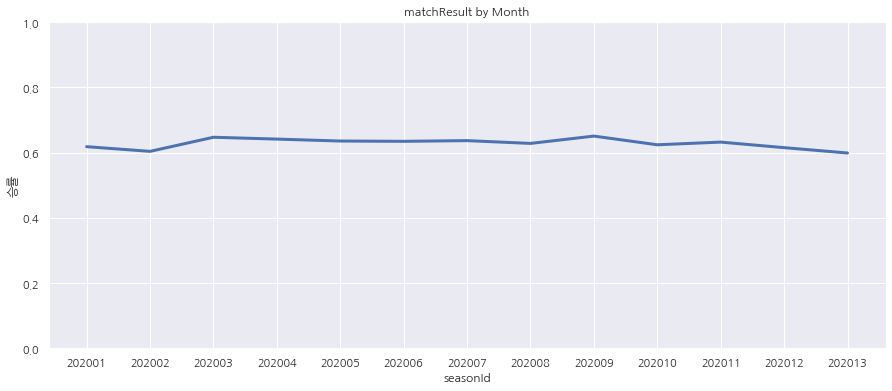

In [144]:
plt.rcParams['font.family'] = 'NanumGothic' # 한글 깨짐 현상 방지
plt.ylim((0,1))
sns.lineplot(data = df_matchResult['승률'], linewidth = 3).set_title("matchResult by Month")

plt.show()

### 1. 경기 결과  
- 시각화를 통해 알 수 있는 사실   
    1. 무승부 결과가 승, 패 결과보다 적다.  
    2. 상위 랭커들의 데이터이다 보니 승률이 0.5보다 크다.  
    3. 승률이 0.6에서 크게 변하지 않는다.((피파 홈페이지에 나와있는 승률과 차이나는 이유는 몰수승, 몰수패 때문일 수도 있음.))

In [65]:
# controller 
df_controller = pd.pivot_table(data = df, index = 'seasonId', columns = "controller", aggfunc = "size", fill_value = 0)
df_controller = df_controller.iloc[:, :]
df_controller

controller,etc,gamepad,keyboard
seasonId,,,
202001,275,0,0
202002,1257,0,0
202003,247,739,68
202004,0,1200,147
202005,0,1262,85
202006,0,1498,81
202007,0,2301,259
202008,0,1590,177
202009,0,2298,304


In [73]:
# 게임패드 사용비율
df_controller['gamepad'] / (df_controller['gamepad'] + df_controller['keyboard'])

seasonId
202001         NaN
202002         NaN
202003    0.915737
202004    0.890869
202005    0.936897
202006    0.948702
202007    0.898828
202008    0.899830
202009    0.883167
202010    0.786660
202011    0.802408
202012    0.872143
202013    0.856889
dtype: float64

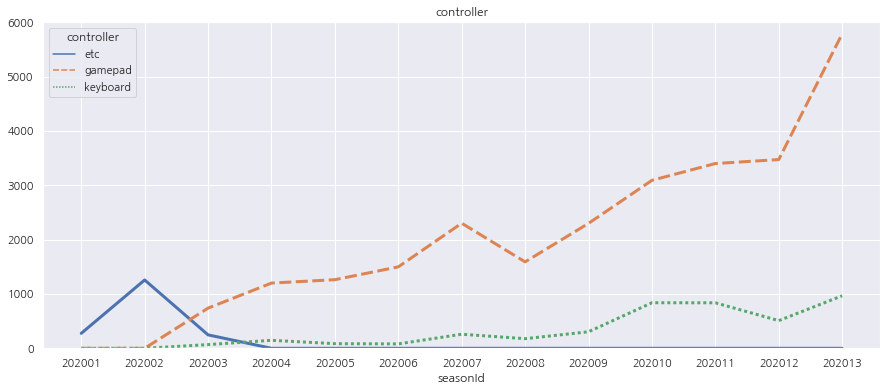

In [148]:
plt.rcParams['font.family'] = 'NanumGothic' # 한글 깨짐 현상 방지
plt.ylim((0,6000))
sns.lineplot(data = df_controller, linewidth = 3).set_title("controller")

plt.show()

### 2. controller      
202001, 202002에서는 gamepad와 keyboard 사용 전혀 하지 않은 것으로 나오는데 말이 안 되는 것 같음.  
`gamepad와 keyboard 사용자를 따로 구분하기 시작했던게 202003이 아닐까 싶음.`    
202004부터는 컨트롤러로 etc(기타)를 사용하기 보다는 gamepad와 keyboard를 절대적으로 많이 사용함을 확인할 수 있다.    
202004부터 사용한 gamepad와 keyboard의 비율을 보면 `게임패드 사용비율이 훨씬 높다는 것을 알 수 있다.`     

게임패드는 따로 구매를 해야함에도 불구하고 게임패드로 게임하는 유저들이 훨씬 많음.->게임패드가 게임에 더 유리함을 확인할 수 있다..    
피씨방 등에서는 키보드로 게임을 해야하는 경우가 많으니 유저들이 키보드로도 높은 랭킹을 유지하는 것이 가능하도록 만들면 좋을 것 같다. 


## 이제 수치형자료!

### 3. yellowcards   
202001->202002에서 떨어짐.  
해석: 3rd 업데이트가 되고 시즌을 거치며 적응: 시즌2부터는 안정된 플레이를 하게 되었기 때문일 것 같다.  
  
### 4. dribble  
202004부터 60대 단위->90대 단위로 올랐다.  
플레이어들이 시즌4가 되며 시즌 시작할 때 적용되었던 업데이트에 적응이 많이 되면서 게임을 더 잘하게 되었기 때문에 드리블 단위 올라간 것으로 추측   
  
### 5. shootHeading/goalHeading  
202007, 202013에 줄어드는 것을 알 수 있음.  
202007 업데이트에서 전반적인 슈팅의 속도 및 슛 파워 능력치에 따른 슈팅의 속도도 하향 조정됨.  
202013에 줄어드는 이유는 5th  next field 업데이트(헤딩슛 에러율 향상)가 시즌 13 중간에 진행되었기 때문이라고 생각할 수 있음.  
 
### 6. pass 
<shortPassTry / shortPassSuccess>  
<longPassTry/longPassSuccess>  
<throughPassTry/throughPassSuccess>  
202007-202009에 랭커들이 갑자기 패스를 아주 적게 시도했다고 말하기는 어려움.    
4th 업데이트 후 패스 방식 조정-유저들이 적응하는 과도기였거나 게임 자체의 문제일 수도  

In [75]:
# 시즌별로 묶기
df_month = df.groupby('seasonId').mean()
del df_month['matchEndType']
df_month 

,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess
seasonId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202001,0.090909,0.730909,0.174545,0.007273,0.076364,60.120000,1.440000,49.560000,0.247273,4.189435,5.843636,4.592727,0.312727,2.149091,2.181818,0.018182,1.061818,0.443636,0.076364,0.000000,4.327273,1.876364,1.403636,0.232727,0.069091,0.040000,112.832727,102.505455,87.996364,82.974545,6.483636,4.716364,0.080000,0.032727,3.647273,3.258182,12.338182,10.545455,1.458182,0.978182,7.189091,0.563636,13.858182,7.516364
202002,0.241846,0.633254,0.175815,0.003978,0.031822,59.926810,1.603023,49.779634,0.344471,4.272350,5.937152,4.696102,0.351631,1.926810,1.956245,0.010342,1.005569,0.340493,0.113763,0.012729,4.295943,1.571997,1.511535,0.308671,0.054893,0.046142,120.982498,109.943516,95.438345,90.064439,6.942721,4.807478,0.044551,0.024662,3.743835,3.350835,12.252188,10.526651,1.642005,1.169451,7.501193,0.603819,13.661893,7.194113
202003,0.173624,0.562619,0.154649,0.001898,0.024668,68.654649,1.592030,49.666034,0.385199,4.231984,6.235294,4.895636,0.264706,2.082543,2.116698,0.011385,1.144213,0.361480,0.121442,0.024668,4.229602,1.645161,1.883302,0.397533,0.057875,0.039848,116.097723,105.869070,90.745731,85.893738,7.959203,5.804554,0.061670,0.030361,3.829222,3.464896,11.084440,9.570209,1.560721,1.105313,7.316888,0.590133,13.492410,7.055028
202004,0.130661,0.628062,0.135857,0.002970,0.025241,90.778768,1.576837,50.328137,0.397179,4.222556,6.231626,4.868597,0.364514,2.097253,2.126206,0.011136,1.206385,0.436526,0.102450,0.014105,4.238307,1.677803,1.841128,0.363771,0.075724,0.055679,115.900520,105.706013,88.914625,83.988122,8.358575,6.244246,0.066073,0.032665,4.482554,4.042316,11.919822,10.448404,1.301411,0.950260,7.292502,0.564959,12.827765,6.917595
202005,0.191537,0.597624,0.184113,0.004454,0.020045,91.162584,1.592428,51.176689,0.338530,4.257387,6.115813,4.889384,0.342242,2.164811,2.195249,0.017817,1.354863,0.510765,0.063846,0.008909,4.328137,1.760950,1.652561,0.354120,0.059391,0.049740,117.871566,107.265033,88.887157,84.014105,8.195249,5.829250,0.052710,0.023756,4.386785,3.994061,14.193764,12.495174,1.239792,0.908686,7.029696,0.563474,13.259837,7.337045
202006,0.217859,0.594680,0.153262,0.001267,0.021533,92.309690,1.502217,50.916403,0.367321,4.259595,5.749842,4.616213,0.329322,2.150728,2.184927,0.017099,1.053832,0.394554,0.070931,0.006333,4.234326,1.789740,1.379987,0.307790,0.064598,0.053198,120.225459,109.504750,91.137429,86.060798,8.518683,6.338822,0.064598,0.032299,4.024066,3.585814,14.369221,12.614313,1.222926,0.872704,6.944269,0.511716,13.671944,7.495883
202007,0.152734,0.692187,0.173437,0.003516,0.033594,92.685547,1.330469,50.911328,0.378125,4.223077,5.427734,4.357422,0.283984,1.983203,2.012891,0.014063,0.650781,0.227734,0.089453,0.010937,4.077734,1.677734,1.191797,0.246094,0.076563,0.059375,119.943750,109.189844,35.427734,33.091797,2.633984,2.237109,0.031250,0.015234,1.869141,1.615625,7.368750,6.511719,0.814844,0.587891,7.227734,0.521484,15.419531,7.699609
202008,0.127900,0.623090,0.170911,0.002264,0.029428,90.795699,1.488398,50.712507,0.338993,4.223536,5.769100,4.544992,0.298812,2.007357,2.033956,0.021505,0.936616,0.313526,0.100736,0.016978,4.258065,1.682513,1.344086,0.259196,0.089417,0.065648,119.494058,108.516695,56.740238,53.031126,4.024335,3.347482,0.046406,0.024901,3.748727,3.138653,13.545557,12.002830,1.585739,1.130164,7.361630,0.567629,13.997170,7.143746
202009,0.154881,0.73

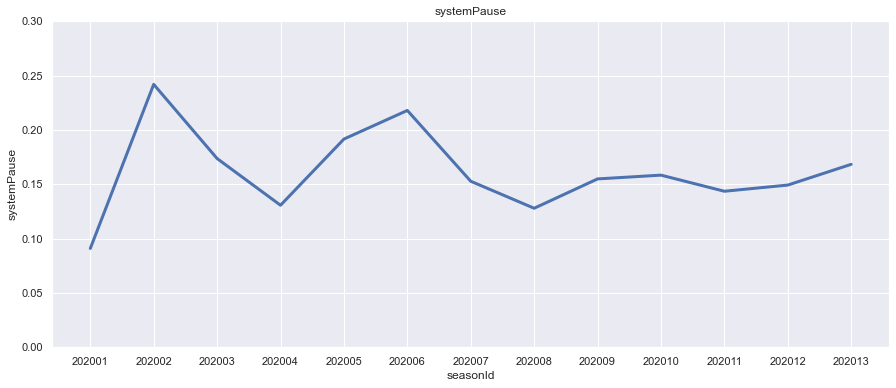

In [139]:
# 3. systemPause  
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 0.3))
sns.lineplot(data = df_month['systemPause'], linewidth = 3).set_title("systemPause")

plt.show()

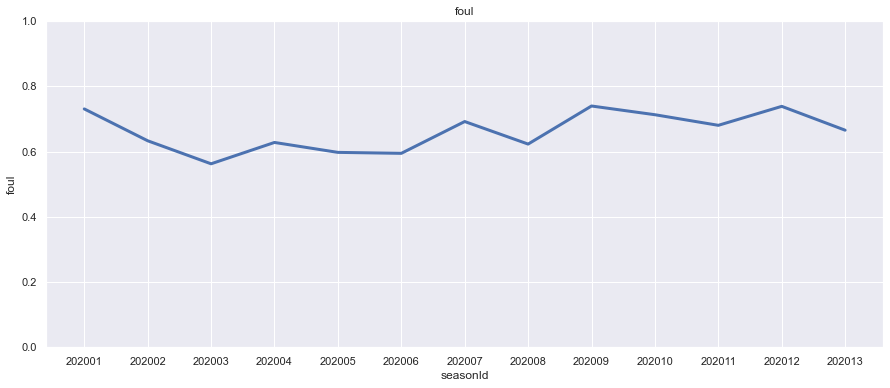

In [79]:
# 4. foul
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 1))
sns.lineplot(data = df_month['foul'], linewidth = 3).set_title("foul")

plt.show()

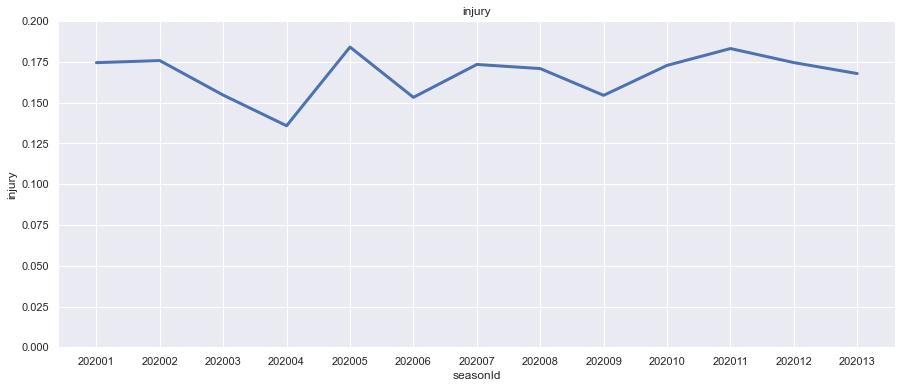

In [145]:
# 5. injury
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 0.2))
sns.lineplot(data = df_month['injury'], linewidth = 3).set_title("injury")

plt.show()

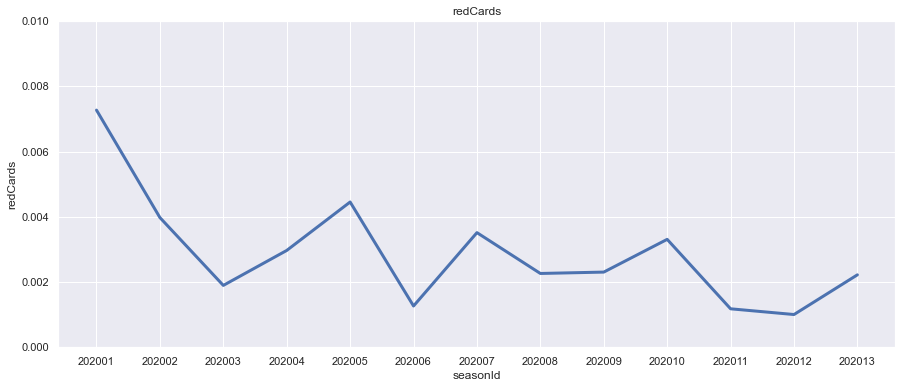

In [134]:
# 6. redCards
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 0.01))
sns.lineplot(data = df_month['redCards'], linewidth = 3).set_title("redCards")

plt.show()

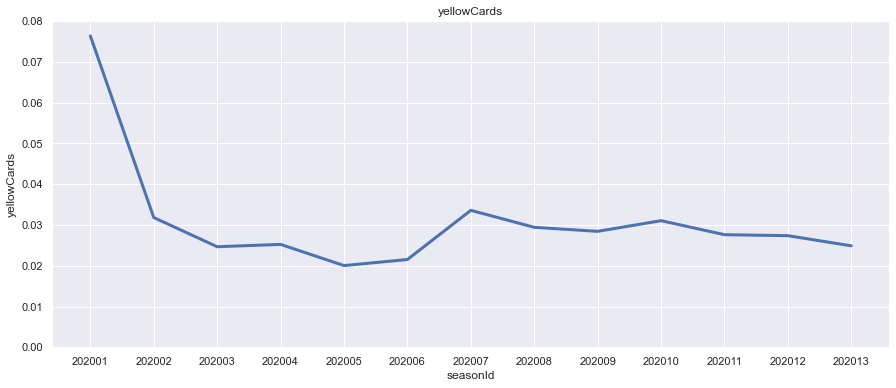

In [135]:
# 7. yellowCards
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 0.08))
sns.lineplot(data = df_month['yellowCards'], linewidth = 3).set_title("yellowCards")

plt.show()

### 3. yellowcards   
202001->202002에서 떨어짐.  
해석: 3rd 업데이트가 되고 시즌을 거치며 적응: 시즌2부터는 안정된 플레이를 하게 되었기 때문일 것 같다.

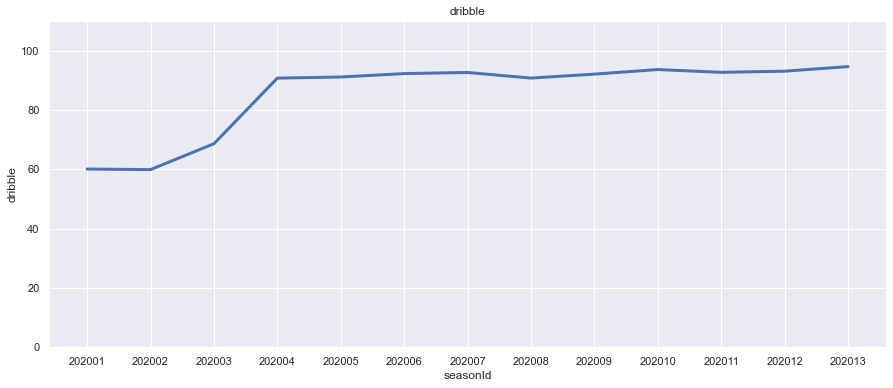

In [89]:
# 8. dribble
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0, 110))
sns.lineplot(data = df_month['dribble'], linewidth = 3).set_title("dribble")

plt.show()

### 4. dribble  
202004부터 60대 단위->90대 단위로 올랐다.  
플레이어들이 시즌4가 되며 시즌 시작할 때 적용되었던 업데이트에 적응이 많이 되면서 게임을 더 잘하게 되었기 때문에 드리블 단위 올라간 것으로 추측


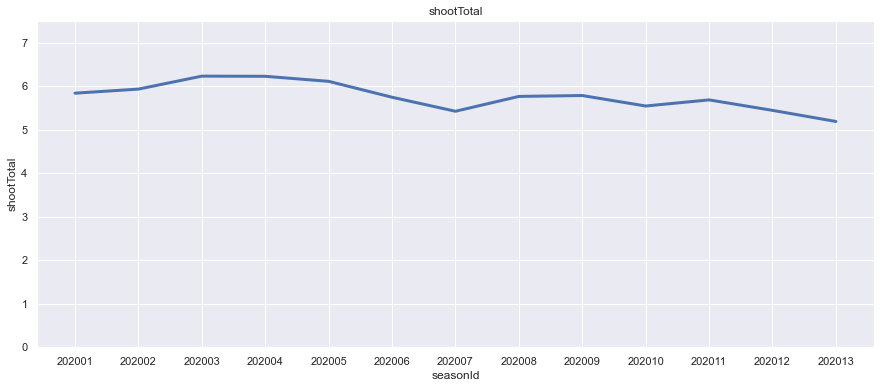

In [93]:
# 13. shootTotal
sns.set(rc={'figure.figsize':(15, 6)})

plt.ylim((0,  7.5))
sns.lineplot(data = df_month['shootTotal'], linewidth = 3).set_title("shootTotal")

plt.show()

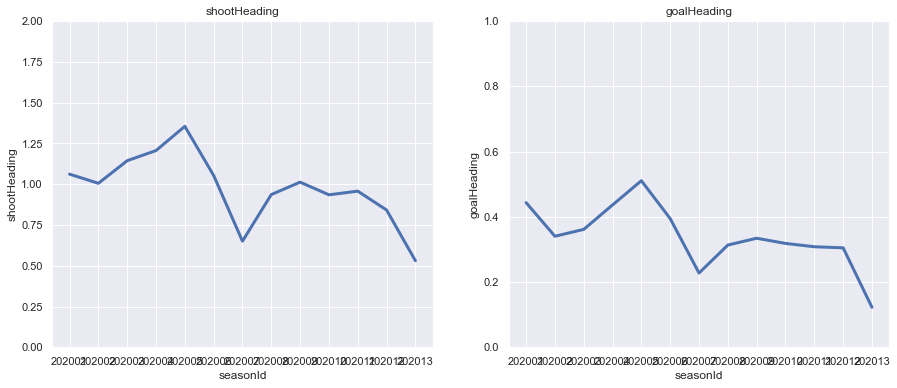

In [98]:
# shootHeading/goalHeading
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  2))
sns.lineplot(data = df_month['shootHeading'], linewidth = 3).set_title("shootHeading")

plt.subplot(1,2,2)
plt.ylim((0,  1))
sns.lineplot(data = df_month['goalHeading'], linewidth = 3).set_title("goalHeading")

plt.show()

### 5. shootHeading/goalHeading  
202007, 202013에 줄어드는 것을 알 수 있음.  
202007 업데이트에서 전반적인 슈팅의 속도 및 슛 파워 능력치에 따른 슈팅의 속도도 하향 조정됨.  
202013에 줄어드는 이유는 5th  next field 업데이트(헤딩슛 에러율 향상)가 시즌 13 중간에 진행되었기 때문이라고 생각할 수 있음.  

In [103]:
# 성공비율로 바꾸기
df_month['PassSuccess_rate'] = df_month['passSuccess'] / df_month['passTry']
df_month['shortPassSuccess_rate'] = df_month['shortPassSuccess'] / df_month['shortPassTry']
df_month['longPassSuccess_rate'] = df_month['longPassSuccess'] / df_month['longPassTry']
df_month['bouncingLobPassSuccess_rate'] = df_month['bouncingLobPassSuccess'] / df_month['bouncingLobPassTry']
df_month['drivenGroundPassSuccess_rate'] = df_month['drivenGroundPassSuccess'] / df_month['drivenGroundPassTry']
df_month['throughPassSuccess_rate'] = df_month['throughPassSuccess'] / df_month['throughPassTry']
df_month['lobbedThroughPassSuccess_rate'] = df_month['lobbedThroughPassSuccess'] / df_month['lobbedThroughPassTry']
df_month['blockSuccess_rate'] = df_month['blockSuccess'] / df_month['blockTry']
df_month['tackleSuccess_rate'] = df_month['tackleSuccess'] / df_month['tackleTry']

In [ ]:
# 성공비율로 바꾸기
# df['PassSuccess_rate'] = df['passSuccess'] / df['passTry']
# df['shortPassSuccess_rate'] = df['shortPassSuccess'] / df['shortPassTry']
# df['longPassSuccess_rate'] = df['longPassSuccess'] / df['longPassTry']
# df['bouncingLobPassSuccess_rate'] = df['bouncingLobPassSuccess'] / df['bouncingLobPassTry']
# df['drivenGroundPassSuccess_rate'] = df['drivenGroundPassSuccess'] / df['drivenGroundPassTry']
# df['throughPassSuccess_rate'] = df['throughPassSuccess'] / df['throughPassTry']
# df['lobbedThroughPassSuccess_rate'] = df['lobbedThroughPassSuccess'] / df['lobbedThroughPassTry']
# df['blockSuccess_rate'] = df['blockSuccess'] / df['blockTry']
# df['tackleSuccess_rate'] = df['tackleSuccess'] / df['tackleTry']


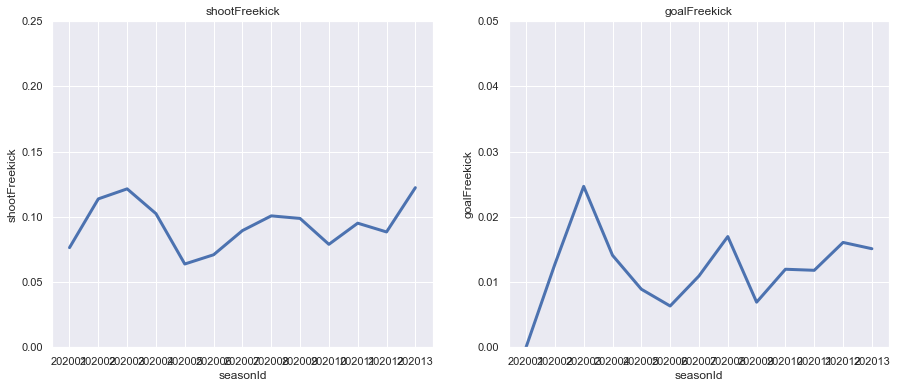

In [102]:
# shootFreekick/goalFreekick
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  0.25))
sns.lineplot(data = df_month['shootFreekick'], linewidth = 3).set_title("shootFreekick")

plt.subplot(1,2,2)
plt.ylim((0,0.05))
sns.lineplot(data = df_month['goalFreekick'], linewidth = 3).set_title("goalFreekick")

plt.show()

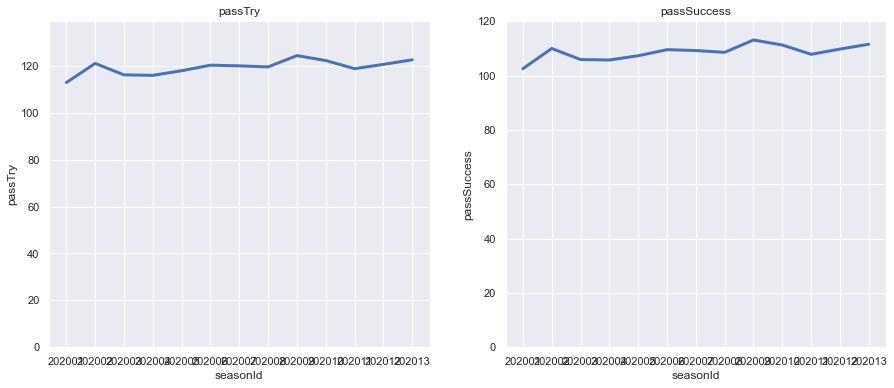

In [147]:
# passTry/passSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  139))
sns.lineplot(data = df_month['passTry'], linewidth = 3).set_title("passTry")

plt.subplot(1,2,2)
plt.ylim((0,120))
sns.lineplot(data = df_month['passSuccess'], linewidth = 3).set_title("passSuccess")

plt.show()

패스 전체적으로 보면 크게 달라지지 않았음.  
왜 하위 패스 항목들에서는 202007-202009 사이에 급격히 낮아졌을까?

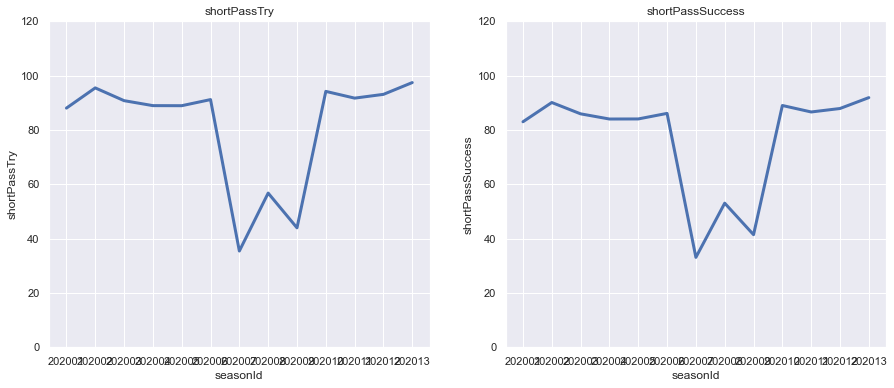

In [162]:
# shortPassTry/shortPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  120))
sns.lineplot(data = df_month['shortPassTry'], linewidth = 3).set_title("shortPassTry")

plt.subplot(1,2,2)
plt.ylim((0,120))
sns.lineplot(data = df_month['shortPassSuccess'], linewidth = 3).set_title("shortPassSuccess")

plt.show()

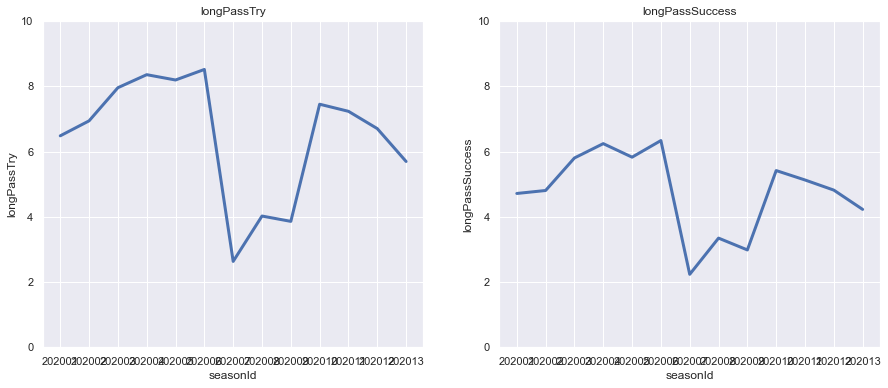

In [116]:
# longPassTry/longPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  10))
sns.lineplot(data = df_month['longPassTry'], linewidth = 3).set_title("longPassTry")

plt.subplot(1,2,2)
plt.ylim((0,10))
sns.lineplot(data = df_month['longPassSuccess'], linewidth = 3).set_title("longPassSuccess")

plt.show()

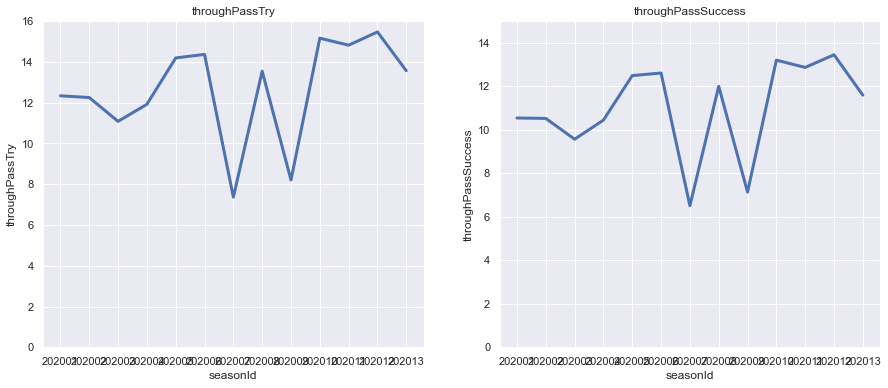

In [123]:
# throughPassTry/throughPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  16))
sns.lineplot(data = df_month['throughPassTry'], linewidth = 3).set_title("throughPassTry")

plt.subplot(1,2,2)
plt.ylim((0,15))
sns.lineplot(data = df_month['throughPassSuccess'], linewidth = 3).set_title("throughPassSuccess")

plt.show()

### <shortPassTry / shortPassSuccess>  
### <longPassTry/longPassSuccess>  
### <throughPassTry/throughPassSuccess>  
202007-202009에 랭커들이 갑자기 패스를 아주 적게 시도했다고 말하기는 어려움.    
4th 업데이트 후 패스 방식 조정-유저들이 적응하는 과도기였거나 서버쪽 문제일 수도

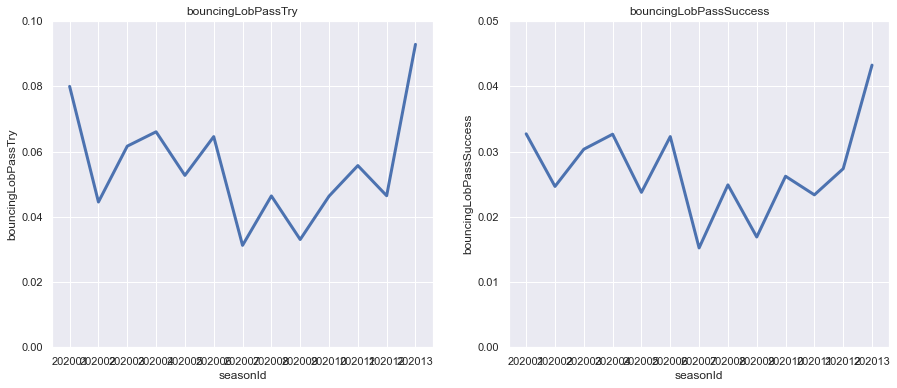

In [119]:
# bouncingLobPassTry/bouncingLobPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  0.1))
sns.lineplot(data = df_month['bouncingLobPassTry'], linewidth = 3).set_title("bouncingLobPassTry")

plt.subplot(1,2,2)
plt.ylim((0,0.050))
sns.lineplot(data = df_month['bouncingLobPassSuccess'], linewidth = 3).set_title("bouncingLobPassSuccess")

plt.show()

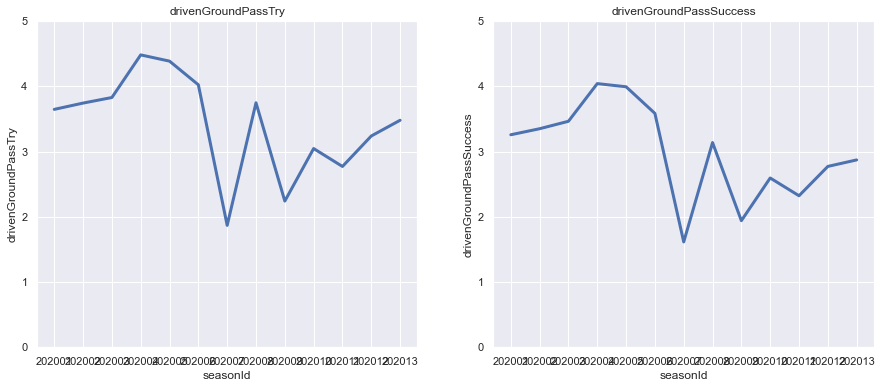

In [121]:
# drivenGroundPassTry/drivenGroundPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  5))
sns.lineplot(data = df_month['drivenGroundPassTry'], linewidth = 3).set_title("drivenGroundPassTry")

plt.subplot(1,2,2)
plt.ylim((0, 5))
sns.lineplot(data = df_month['drivenGroundPassSuccess'], linewidth = 3).set_title("drivenGroundPassSuccess")

plt.show()

### bouncingLobPassTry/bouncingLobPassSuccess  
### drivenGroundPassTry/drivenGroundPassSuccess  
들쑥날쑥하지만 202007에 특히 낮아진다.  

### throughPassTry/throughPassSuccess  
숏패스, 롱패스와 비슷한 양상

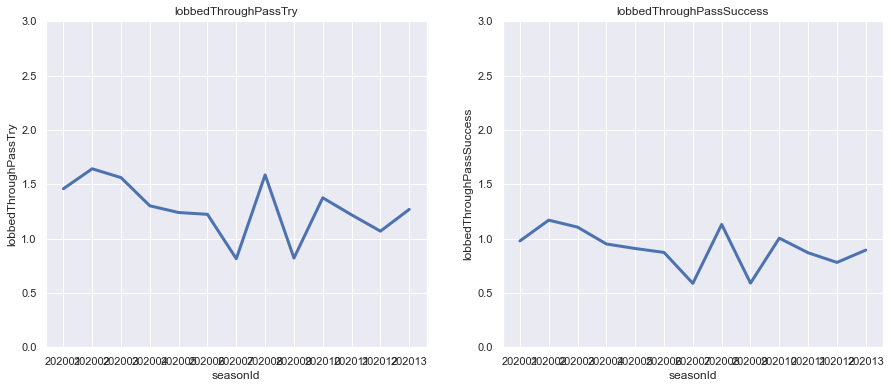

In [125]:
# lobbedThroughPassTry/lobbedThroughPassSuccess
sns.set(rc={'figure.figsize':(15, 6)})

plt.subplot(1,2,1)
plt.ylim((0,  3))
sns.lineplot(data = df_month['lobbedThroughPassTry'], linewidth = 3).set_title("lobbedThroughPassTry")

plt.subplot(1,2,2)
plt.ylim((0,3))
sns.lineplot(data = df_month['lobbedThroughPassSuccess'], linewidth = 3).set_title("lobbedThroughPassSuccess")

plt.show()

202007, 202009에 특히 낮다

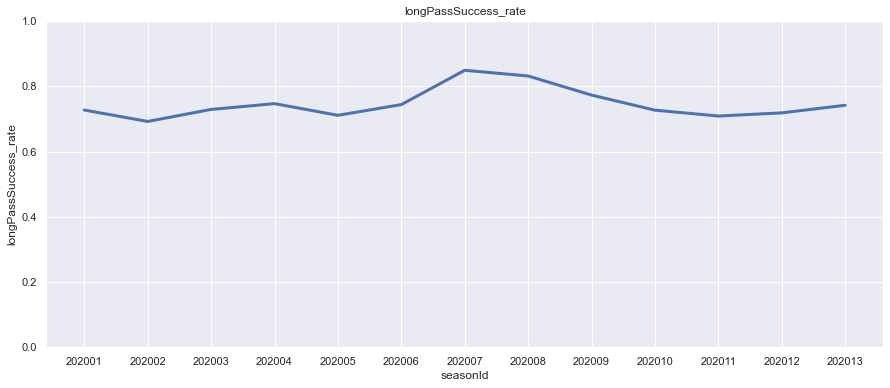

In [127]:
# longPassSuccess_rate
sns.set(rc={'figure.figsize':(15, 6)})

# plt.subplot(1,2,1)
plt.ylim((0,  1))
sns.lineplot(data = df_month['longPassSuccess_rate'], linewidth = 3).set_title("longPassSuccess_rate")

plt.show()

### longPassSuccess_rate

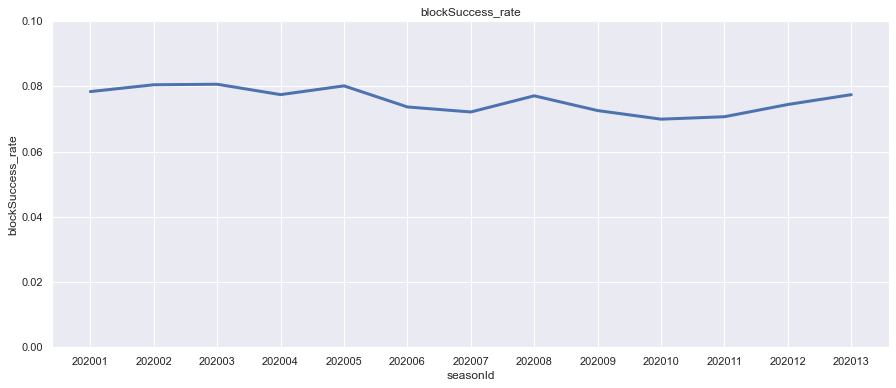

In [131]:
# blockSuccess_rate	
sns.set(rc={'figure.figsize':(15, 6)})

# plt.subplot(1,2,1)
plt.ylim((0,  0.1))
sns.lineplot(data = df_month['blockSuccess_rate'], linewidth = 3).set_title("blockSuccess_rate")

plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(15, 6)})

# plt.subplot(1,2,1)
plt.ylim((0,  1))
sns.lineplot(data = df_month['longPassSuccess_rate'], linewidth = 3).set_title("longPassSuccess_rate")

plt.show()

In [104]:
df_month

,systemPause,foul,injury,redCards,yellowCards,dribble,cornerKick,possession,offsideCount,averageRating,shootTotal,effectiveShootTotal,shootOutScore,goalTotal,goalTotalDisplay,ownGoal,shootHeading,goalHeading,shootFreekick,goalFreekick,shootInPenalty,goalInPenalty,shootOutPenalty,goalOutPenalty,shootPenaltyKick,goalPenaltyKick,passTry,passSuccess,shortPassTry,shortPassSuccess,longPassTry,longPassSuccess,bouncingLobPassTry,bouncingLobPassSuccess,drivenGroundPassTry,drivenGroundPassSuccess,throughPassTry,throughPassSuccess,lobbedThroughPassTry,lobbedThroughPassSuccess,blockTry,blockSuccess,tackleTry,tackleSuccess,PassSuccess_rate,shortPassSuccess_rate,longPassSuccess_rate,bouncingLobPassSuccess_rate,drivenGroundPassSuccess_rate,throughPassSuccess_rate,lobbedThroughPassSuccess_rate,blockSuccess_rate,tackleSuccess_rate
seasonId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
202001,0.090909,0.730909,0.174545,0.007273,0.076364,60.120000,1.440000,49.560000,0.247273,4.189435,5.843636,4.592727,0.312727,2.149091,2.181818,0.018182,1.061818,0.443636,0.076364,0.000000,4.327273,1.876364,1.403636,0.232727,0.069091,0.040000,112.832727,102.505455,87.996364,82.974545,6.483636,4.716364,0.080000,0.032727,3.647273,3.258182,12.338182,10.545455,1.458182,0.978182,7.189091,0.563636,13.858182,7.516364,0.908473,0.942932,0.727426,0.409091,0.893320,0.854701,0.670823,0.078402,0.542377
202002,0.241846,0.633254,0.175815,0.003978,0.031822,59.926810,1.603023,49.779634,0.344471,4.272350,5.937152,4.696102,0.351631,1.926810,1.956245,0.010342,1.005569,0.340493,0.113763,0.012729,4.295943,1.571997,1.511535,0.308671,0.054893,0.046142,120.982498,109.943516,95.438345,90.064439,6.942721,4.807478,0.044551,0.024662,3.743835,3.350835,12.252188,10.526651,1.642005,1.169451,7.501193,0.603819,13.661893,7.194113,0.908756,0.943692,0.692449,0.553571,0.895028,0.859165,0.712209,0.080496,0.526582
202003,0.173624,0.562619,0.154649,0.001898,0.024668,68.654649,1.592030,49.666034,0.385199,4.231984,6.235294,4.895636,0.264706,2.082543,2.116698,0.011385,1.144213,0.361480,0.121442,0.024668,4.229602,1.645161,1.883302,0.397533,0.057875,0.039848,116.097723,105.869070,90.745731,85.893738,7.959203,5.804554,0.061670,0.030361,3.829222,3.464896,11.084440,9.570209,1.560721,1.105313,7.316888,0.590133,13.492410,7.055028,0.911896,0.946532,0.729288,0.492308,0.904856,0.863391,0.708207,0.080654,0.522889
202004,0.130661,0.628062,0.135857,0.002970,0.025241,90.778768,1.576837,50.328137,0.397179,4.222556,6.231626,4.868597,0.364514,2.097253,2.126206,0.011136,1.206385,0.436526,0.102450,0.014105,4.238307,1.677803,1.841128,0.363771,0.075724,0.055679,115.900520,105.706013,88.914625,83.988122,8.358575,6.244246,0.066073,0.032665,4.482554,4.042316,11.919822,10.448404,1.301411,0.950260,7.292502,0.564959,12.827765,6.917595,0.912041,0.944593,0.747047,0.494382,0.901789,0.876557,0.730177,0.077471,0.539267
202005,0.191537,0.597624,0.184113,0.004454,0.020045,91.162584,1.592428,51.176689,0.338530,4.257387,6.115813,4.889384,0.342242,2.164811,2.195249,0.017817,1.354863,0.510765,0.063846,0.008909,4.328137,1.760950,1.652561,0.354120,0.059391,0.049740,117.871566,107.265033,88.887157,84.014105,8.195249,5.829250,0.052710,0.023756,4.386785,3.994061,14.193764,12.495174,1.239792,0.908686,7.029696,0.563474,13.259837,7.337045,0.910016,0.945177,0.711296,0.450704,0.910476,0.880328,0.732934,0.080156,0.553328
202006,0.217859,0.594680,0.153262,0.001267,0.021533,92.309690,1.502217,50.916403,0.367321,4.259595,5.749842,4.616213,0.329322,2.150728,2.184927,0.017099,1.053832,0.394554,0.070931,0.006333,4.234326,1.789740,1.379987,0.307790,0.064598,0.053198,120.225459,109.504750,91.137429,86.060798,8.518683,6.338822,0.064598,0.032299,4.024066,3.585814,14.369221,12.614313,1.222926,0.872704,6.944269,0.511716,13.671944,7.495883,0.910828,0.944297,0.744108,0.500000,0.891092,0.877870,0.713620,0.073689,0.548268
202007,0.152734,0.692187,0.173437,0.003516,0.033594,92.685547,1.330469,50.911328,0.378125,4.223077,5.427734,4.357422,0.283984,1.983203,2.012891

발표->도메인 지식 3-4 페이지  
스포츠 데이터가 아닌 게임 데이터  
피파 온라인이란 무엇인가? -> 게임이다/ 흐름에 민감하다/ 스포츠+게임/ 다른 스포츠 게임과의 구별되는 특징/ 피파온라인4 축구 게임 중에 / 피파온라인4 게임을 하는 비율/ 인기!/피씨방 점유율-스포츠 게임 중에서, 전체 게임 중에서/피파온라인4가 이전 시즌과 구분되는 점은?  
데이터에 대한 전체적인 개요  
랭커 정보를 가져와서->랭커 정보의 최근 1500 경기  
한 랭커 당 1500경기/ ->몰수승, 몰수패 제거
플롯

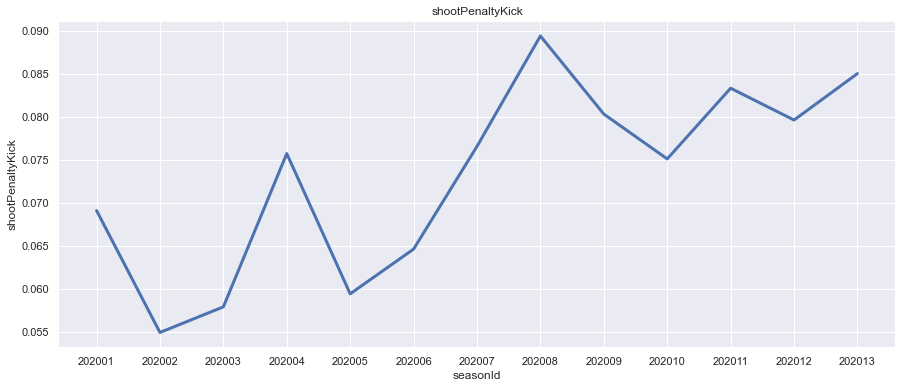

In [161]:
sns.set(rc={'figure.figsize':(15, 6)})

sns.lineplot(data = df_month['shootPenaltyKick'], linewidth = 3).set_title("shootPenaltyKick")

plt.show()

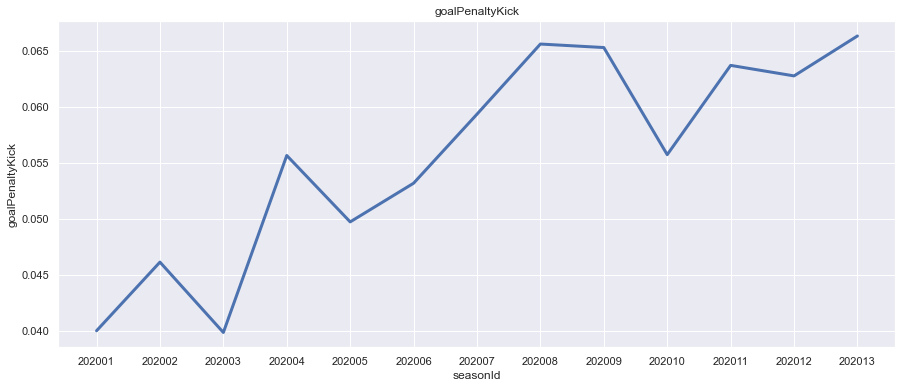

In [137]:
sns.set(rc={'figure.figsize':(15, 6)})

sns.lineplot(data = df_month['goalPenaltyKick'], linewidth = 3).set_title("goalPenaltyKick")

plt.show()